### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
from matplotlib.lines import Line2D

### Importing the dataset

In [2]:
df = pd.read_csv('../../../Datasets/RQ1/vue_metrics.csv')
df.head(10)

,Unnamed: 0,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,0,0.6.0,2013-12-07,1386462737,1.6,0,1.0,1.0,1274,672,6820
1,1,v0.7.0,2013-12-23,1387855865,1.6,0,1.0,1.0,1329,696,7105
2,2,v0.7.1,2013-12-24,1387922313,1.6,0,1.0,1.0,1433,711,7387
3,3,v0.7.2,2013-12-28,1388209420,1.6,0,1.0,1.0,1439,714,7401
4,4,0.10.0-rc,2014-03-19,1395263823,2.3,0,1.0,1.0,3353,2625,15241
5,5,0.11.0,2014-11-06,1415325162,2.4,0,1.0,1.0,2943,1998,14564
6,6,0.11.0-rc,2014-09-26,1411781027,2.3,0,1.0,1.0,2835,1935,13904
7,7,0.11.0-rc2,2014-10-07,1412701646,2.3,0,1.0,1.0,2843,1928,13986
8,8,0.11.0-rc3,2014-10-24,1414123890,2.4,0,1.0,1.0,2912,1958,14418
9,9,0.11.10,2015-05-07,1431025236,2.4,0,1.0,1.0,3302,2223,16638


### Information of the Dataframe 

In [3]:
df.describe()

,Unnamed: 0,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
count,43.000000,4.300000e+01,43.000000,43.000000,43.000000,43.0,43.000000,43.000000,43.000000
mean,21.000000,1.502754e+09,1.676744,0.558140,3.232558,1.0,8455.023256,8250.279070,40553.209302
std,12.556539,9.034029e+07,0.608604,0.502486,2.009942,0.0,5135.902654,6532.850313,23548.642642
min,0.000000,1.386463e+09,0.400000,0.000000,1.000000,1.0,1274.000000,672.000000,6820.000000
25%,10.500000,1.429464e+09,1.500000,0.000000,1.000000,1.0,3243.500000,2199.500000,16214.500000
50%,21.000000,1.487910e+09,1.800000,1.000000,5.000000,1.0,10268.000000,6776.000000,49494.000000
75%,31.500000,1.548669e+09,2.000000,1.000000,5.000000,1.0,12422.500000,14571.000000,60026.500000
max,42.000000,1.698048e+09,2.400000,1.000000,5.000000,1.0,16361.000000,19147.000000,72898.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            43 non-null     int64  
 1   version               43 non-null     object 
 2   release_date          43 non-null     object 
 3   timestamp             43 non-null     int64  
 4   sqale_debt_ratio      43 non-null     float64
 5   vulnerabilities       43 non-null     int64  
 6   security_rating       43 non-null     float64
 7   sqale_rating          43 non-null     float64
 8   complexity            43 non-null     int64  
 9   cognitive_complexity  43 non-null     int64  
 10  ncloc                 43 non-null     int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 3.8+ KB


### Updating Version Names

In [5]:
df['version'] = df['version'].str.replace('v', '')

In [6]:
df['version'] = 'v' + df['version']
df['version']

0              v0.6.0
1              v0.7.0
2              v0.7.1
3              v0.7.2
4          v0.10.0-rc
5             v0.11.0
6          v0.11.0-rc
7         v0.11.0-rc2
8         v0.11.0-rc3
9            v0.11.10
10            v0.11.5
11            v0.11.6
12            v0.11.7
13            v0.11.8
14            v1.0.14
15        v1.0.14-csp
16            v1.0.15
17        v1.0.15-csp
18            v1.0.16
19            v2.1.10
20             v2.1.9
21             v2.2.0
22      v2.2.0-beta.1
23      v2.2.0-beta.2
24            v2.5.14
25            v2.5.15
26            v2.5.16
27            v2.5.17
28     v2.5.17-beta.0
29            v2.5.22
30             v2.6.0
31      v2.6.0-beta.1
32      v2.6.0-beta.2
33      v2.6.0-beta.3
34            v2.6.12
35            v2.6.13
36            v2.6.14
37             v2.7.0
38     v2.7.0-alpha.1
39    v2.7.0-alpha.10
40    v2.7.0-alpha.11
41    v2.7.0-alpha.12
42            v2.7.15
Name: version, dtype: object

### Sorting accoriding to the timeframe

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.head(20)

,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,v0.6.0,2013-12-07,1386462737,1.6,0,1.0,1.0,1274,672,6820
1,v0.7.0,2013-12-23,1387855865,1.6,0,1.0,1.0,1329,696,7105
2,v0.7.1,2013-12-24,1387922313,1.6,0,1.0,1.0,1433,711,7387
3,v0.7.2,2013-12-28,1388209420,1.6,0,1.0,1.0,1439,714,7401
4,v0.10.0-rc,2014-03-19,1395263823,2.3,0,1.0,1.0,3353,2625,15241
5,v0.11.0,2014-11-06,1415325162,2.4,0,1.0,1.0,2943,1998,14564
6,v0.11.0-rc,2014-09-26,1411781027,2.3,0,1.0,1.0,2835,1935,13904
7,v0.11.0-rc2,2014-10-07,1412701646,2.3,0,1.0,1.0,2843,1928,13986
8,v0.11.0-rc3,2014-10-24,1414123890,2.4,0,1.0,1.0,2912,1958,14418
9,v0.11.10,2015-05-07,1431025236,2.4,0,1.0,1.0,3302,2223,16638


## Correlation

In [9]:
df_cor = df.drop(['version', 'release_date', 'timestamp','sqale_rating'], axis=1)

### Pearson Correlation

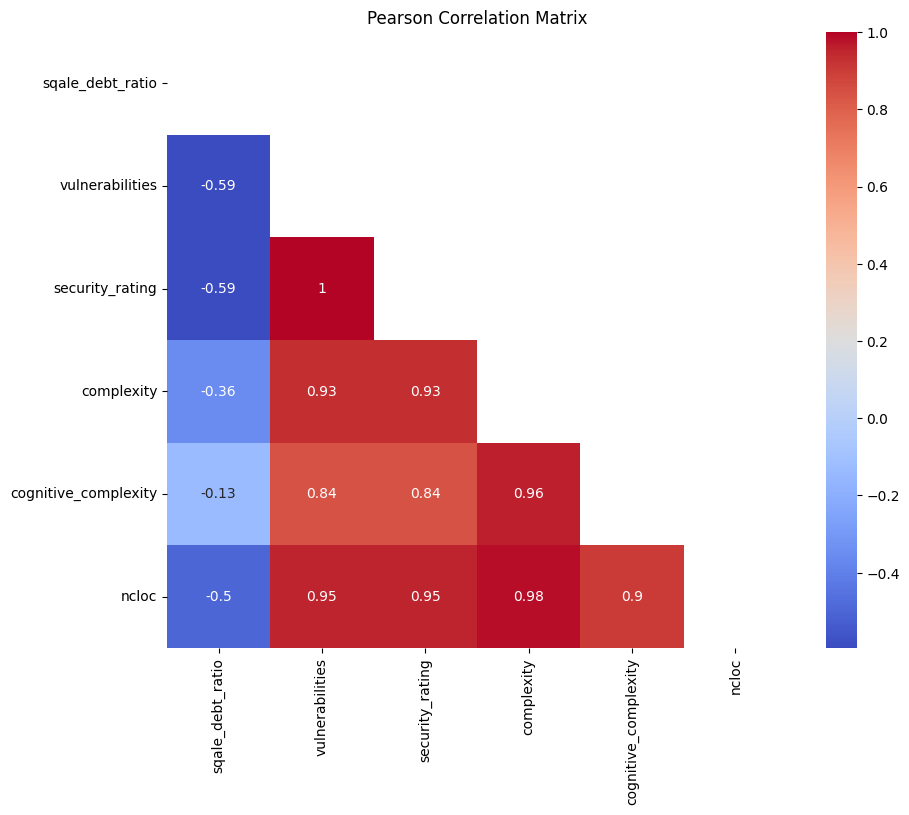

In [10]:
correlation_matrix = df_cor.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Pearson Correlation Matrix')
plt.show()

### Spearman Correlation

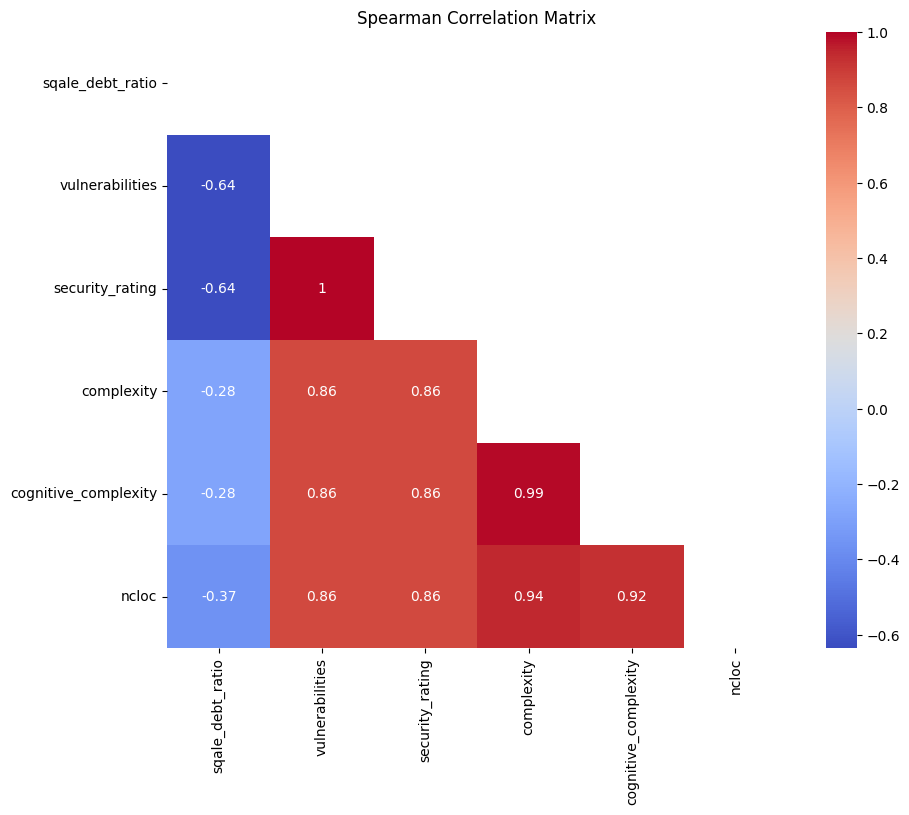

In [11]:
correlation_matrix = df_cor.corr(method ='spearman')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Spearman Correlation Matrix')
plt.show()

In [12]:
df['timestamp']

0     1386462737
1     1387855865
2     1387922313
3     1388209420
4     1395263823
5     1415325162
6     1411781027
7     1412701646
8     1414123890
9     1431025236
10    1423171588
11    1429341079
12    1429586386
13    1429647040
14    1452543146
15    1452544748
16    1453146224
17    1453146702
18    1454146899
19    1484673432
20    1484610487
21    1488083295
22    1487910141
23    1487980870
24    1520631707
25    1520725002
26    1520979260
27    1533151873
28    1521847742
29    1547248711
30    1549295824
31    1547655667
32    1548477520
33    1548860377
34    1597929059
35    1622557728
36    1623059728
37    1656649346
38    1653991057
39    1655371108
40    1655373221
41    1655387579
42    1698047740
Name: timestamp, dtype: int64

### Checking for the categorical and numerical columns

In [13]:
df_cor.columns

Index(['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'complexity',
       'cognitive_complexity', 'ncloc'],
      dtype='object')

In [14]:
columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating','complexity',
       'cognitive_complexity', 'ncloc']
for col in columns: 
    print(f'Count for {col}')   
    print(df[col].value_counts())
    print('------------------------')

Count for sqale_debt_ratio
sqale_debt_ratio
2.4    7
1.9    7
1.6    6
0.4    6
1.5    5
2.3    3
1.8    3
2.0    2
1.4    2
1.7    2
Name: count, dtype: int64
------------------------
Count for vulnerabilities
vulnerabilities
1    24
0    19
Name: count, dtype: int64
------------------------
Count for security_rating
security_rating
5.0    24
1.0    19
Name: count, dtype: int64
------------------------
Count for sqale_rating
sqale_rating
1.0    43
Name: count, dtype: int64
------------------------
Count for complexity
complexity
10478    2
1274     1
15344    1
11485    1
12308    1
12309    1
12419    1
12426    1
12447    1
12620    1
15610    1
15569    1
1329     1
15581    1
16216    1
16333    1
16361    1
10578    1
9455     1
10499    1
12533    1
11502    1
10264    1
10268    1
1433     1
1439     1
3353     1
2943     1
2835     1
2843     1
2912     1
3302     1
3123     1
3240     1
3247     1
3231     1
4187     1
5205     1
4196     1
5214     1
4241     1
10936    1
Na

### Categorical Columns Visulaization

C:\Users\sadik\AppData\Local\Temp\ipykernel_35056\3711524625.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_35056\3711524625.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_35056\3711524625.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_35056

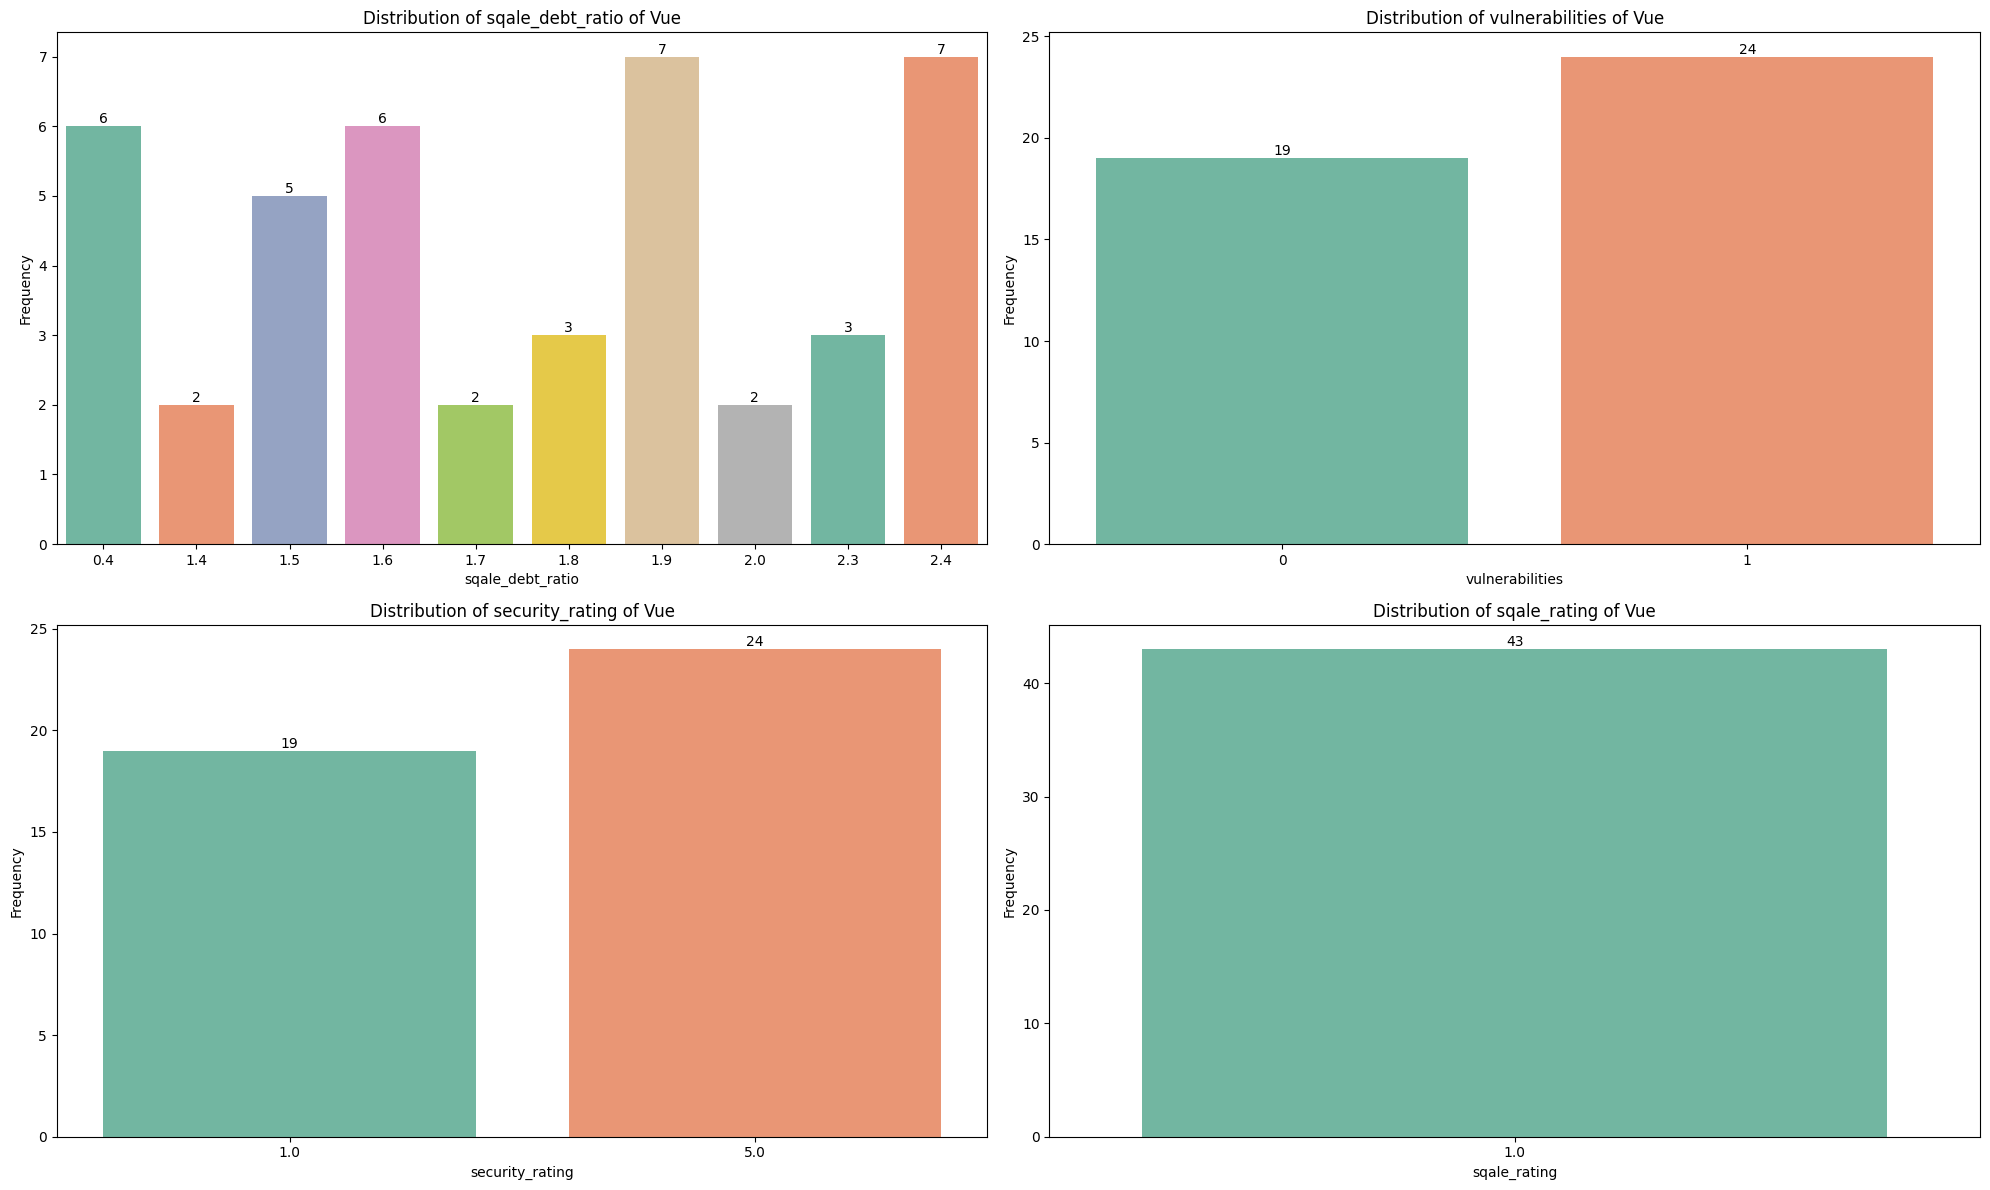

In [15]:
categorical_columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating']
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for ax, col in zip(axs.flatten(), categorical_columns):
    countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col} of Vue')
    for p in countplot.patches:
        countplot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 5), 
                           textcoords = 'offset points')
plt.tight_layout()
plt.show()

### Numerical Columns Visualization

#### Using Histogram

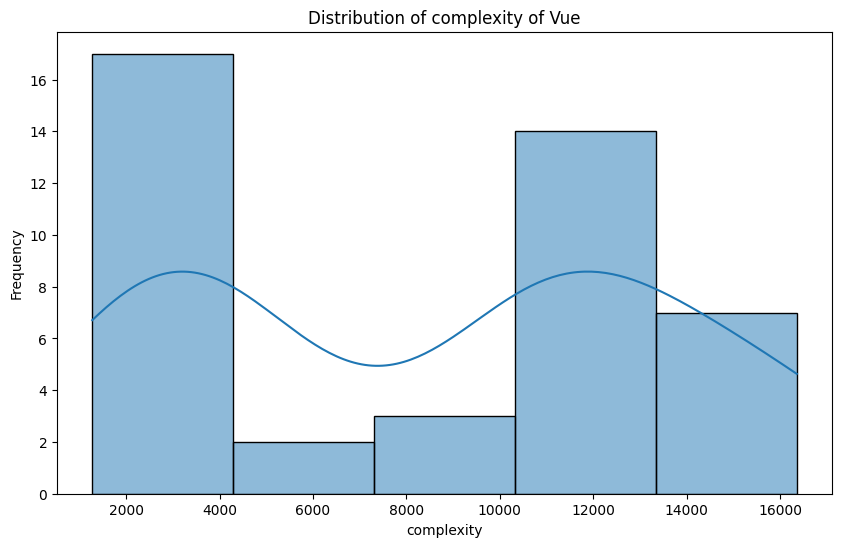

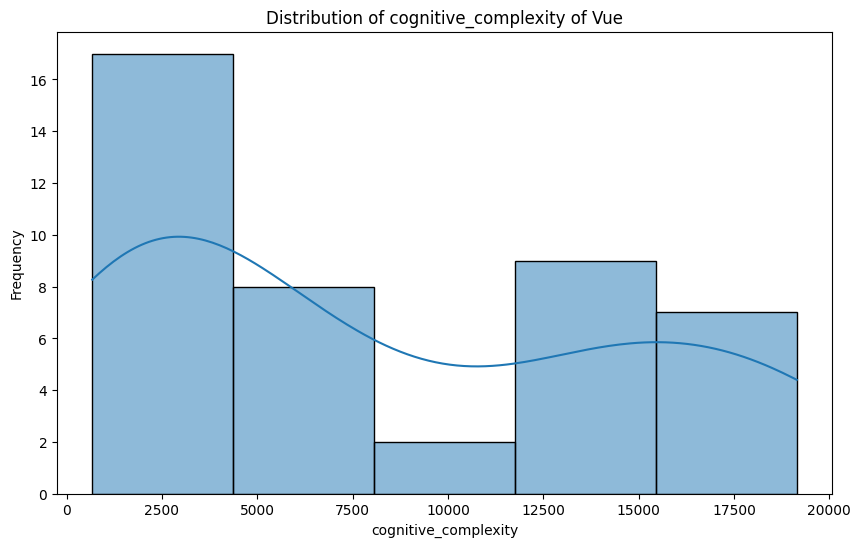

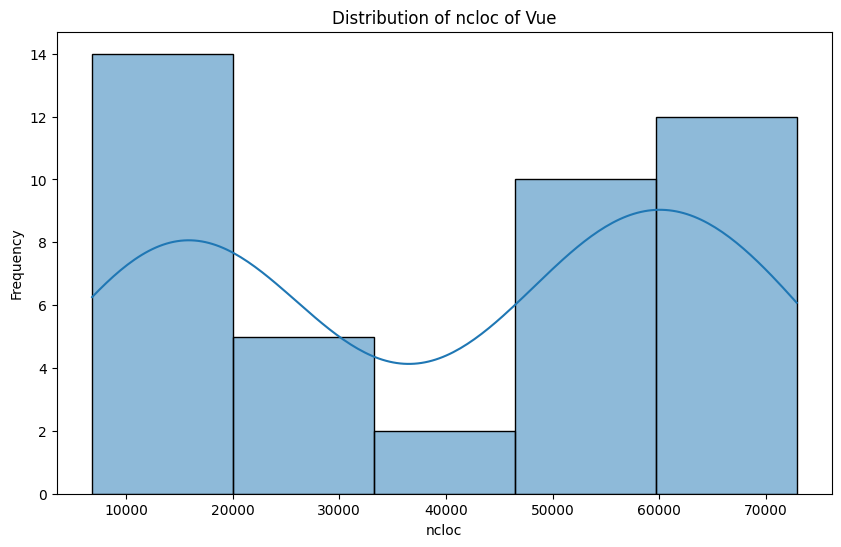

In [16]:
numerical_columns = ['complexity', 'cognitive_complexity', 'ncloc']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    histplot = sns.histplot(df[col], bins=5, kde=True)
    plt.title(f'Distribution of {col} of Vue')
    histplot.set_ylabel('Frequency')
    plt.show()

#### Using Boxplot

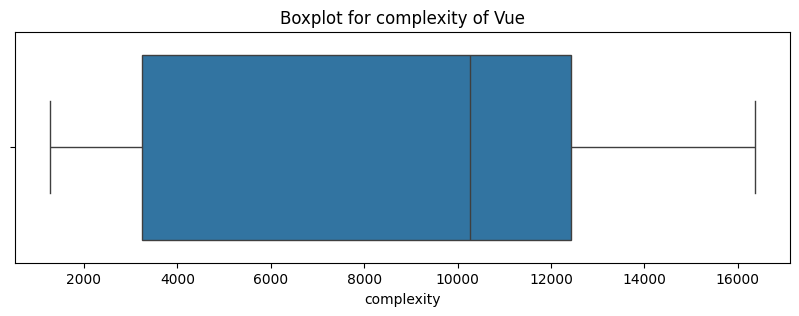

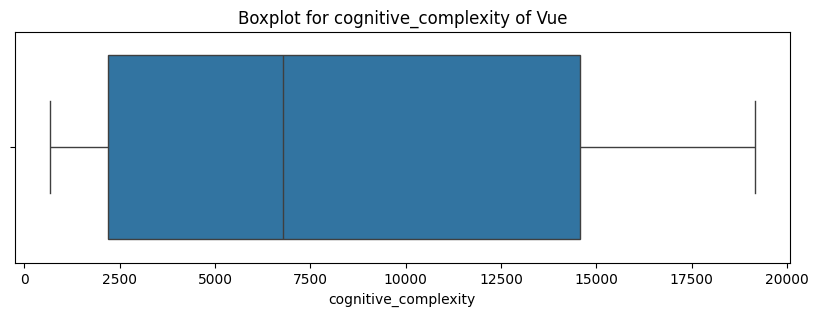

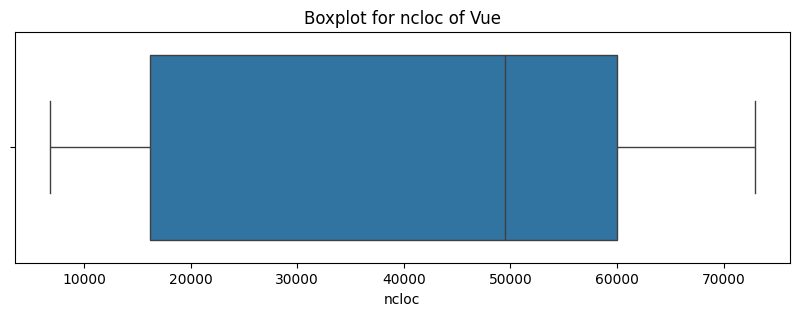

In [17]:
for col in numerical_columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} of Vue')
    plt.show()

### Visualization using Control Chart

In [18]:
columns_for_controlChart = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating', 'complexity', 'cognitive_complexity', 'ncloc']

C:\Users\sadik\AppData\Local\Temp\ipykernel_35056\1433378755.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_35056\1433378755.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_35056\1433378755.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_35056\1433378755.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels

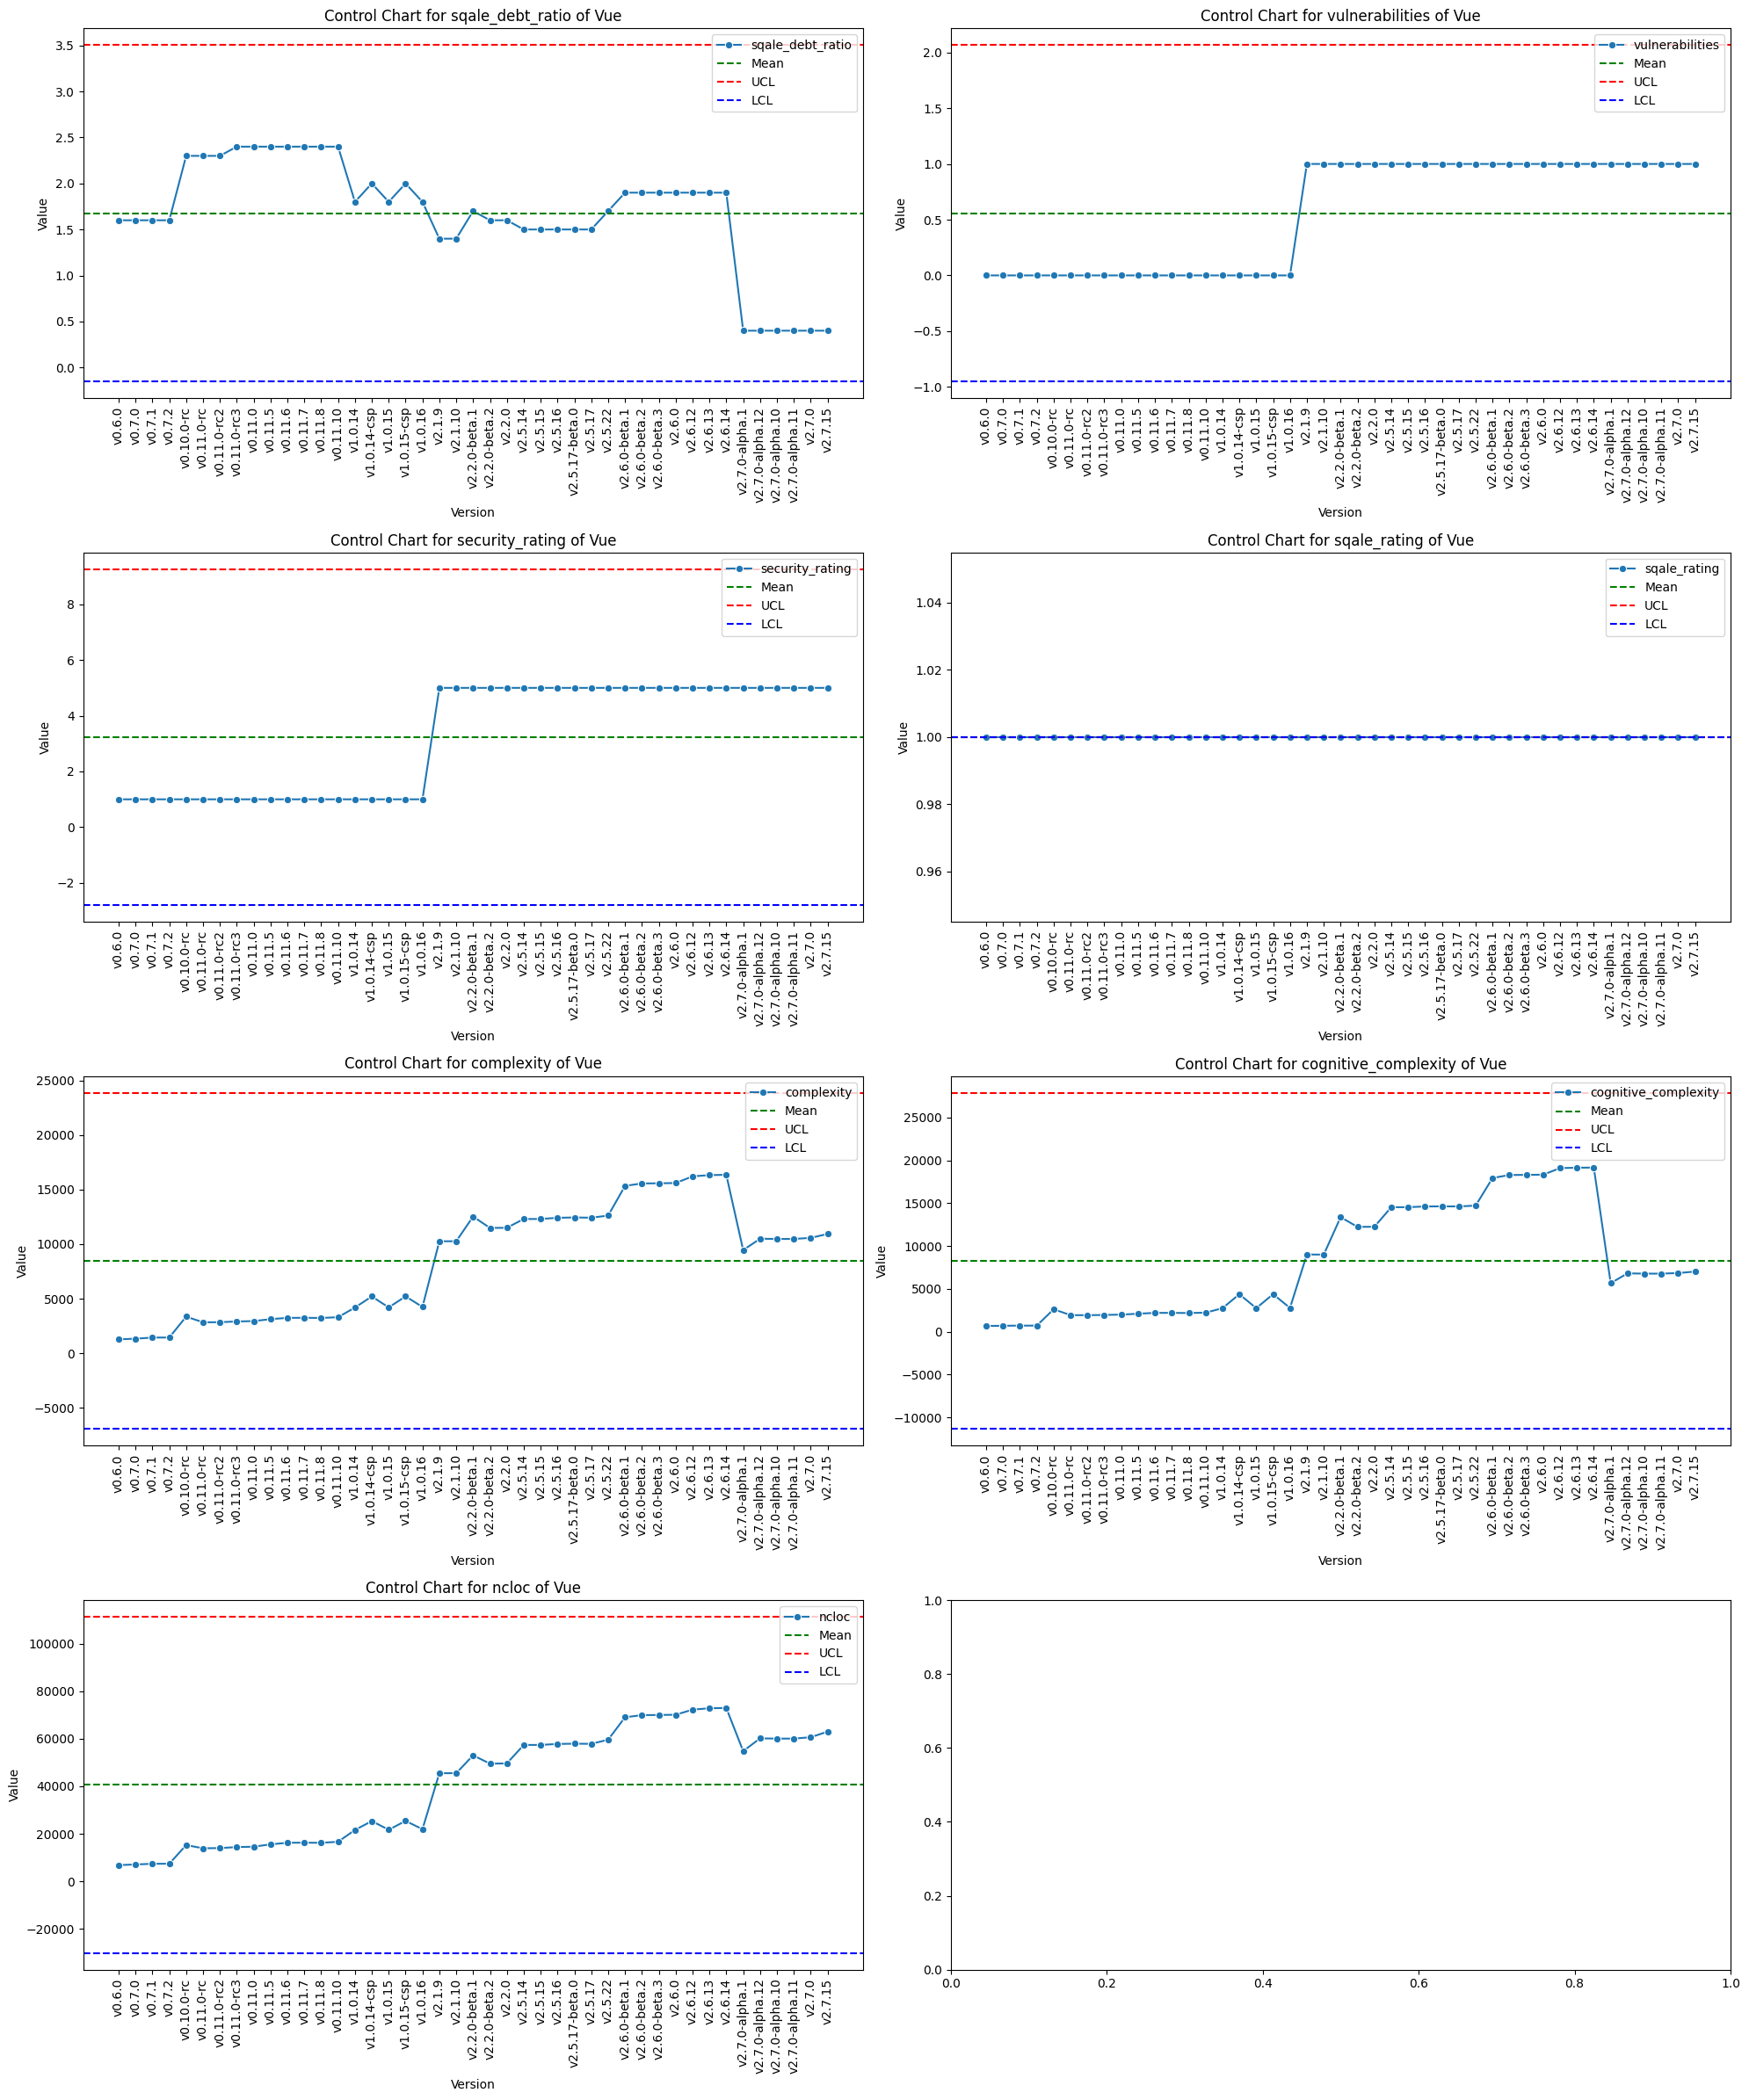

In [30]:
import numpy as np
import math

df['release_date'] = pd.to_datetime(df['release_date'])

# Sort DataFrame by 'release_date'
df = df.sort_values('release_date')

# Calculate the number of rows needed for the subplots
n = len(columns_for_controlChart)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 6*nrows))

# Flatten the axes array for easy iteration
axs = np.ravel(axs)

for i, col in enumerate(columns_for_controlChart):
    # Calculate mean and standard deviation
    mean = df[col].mean()
    std_dev = df[col].std()

    # Calculate control limits
    ucl = mean + 3*std_dev
    lcl = mean - 3*std_dev

    # Plot the data, mean, and control limits
    sns.lineplot(x=df['version'], y=df[col], label=col, marker='o', ax=axs[i])
    axs[i].axhline(mean, color='g', linestyle='--', label='Mean')
    axs[i].axhline(ucl, color='r', linestyle='--', label='UCL')
    axs[i].axhline(lcl, color='b', linestyle='--', label='LCL')

    axs[i].set_title(f'Control Chart for {col} of Vue')
    axs[i].set_ylabel('Value')
    axs[i].set_xlabel('Version')
    axs[i].legend()

    # Rotate x-axis labels by 90 degrees
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

### Visualizing every column using Pairplot

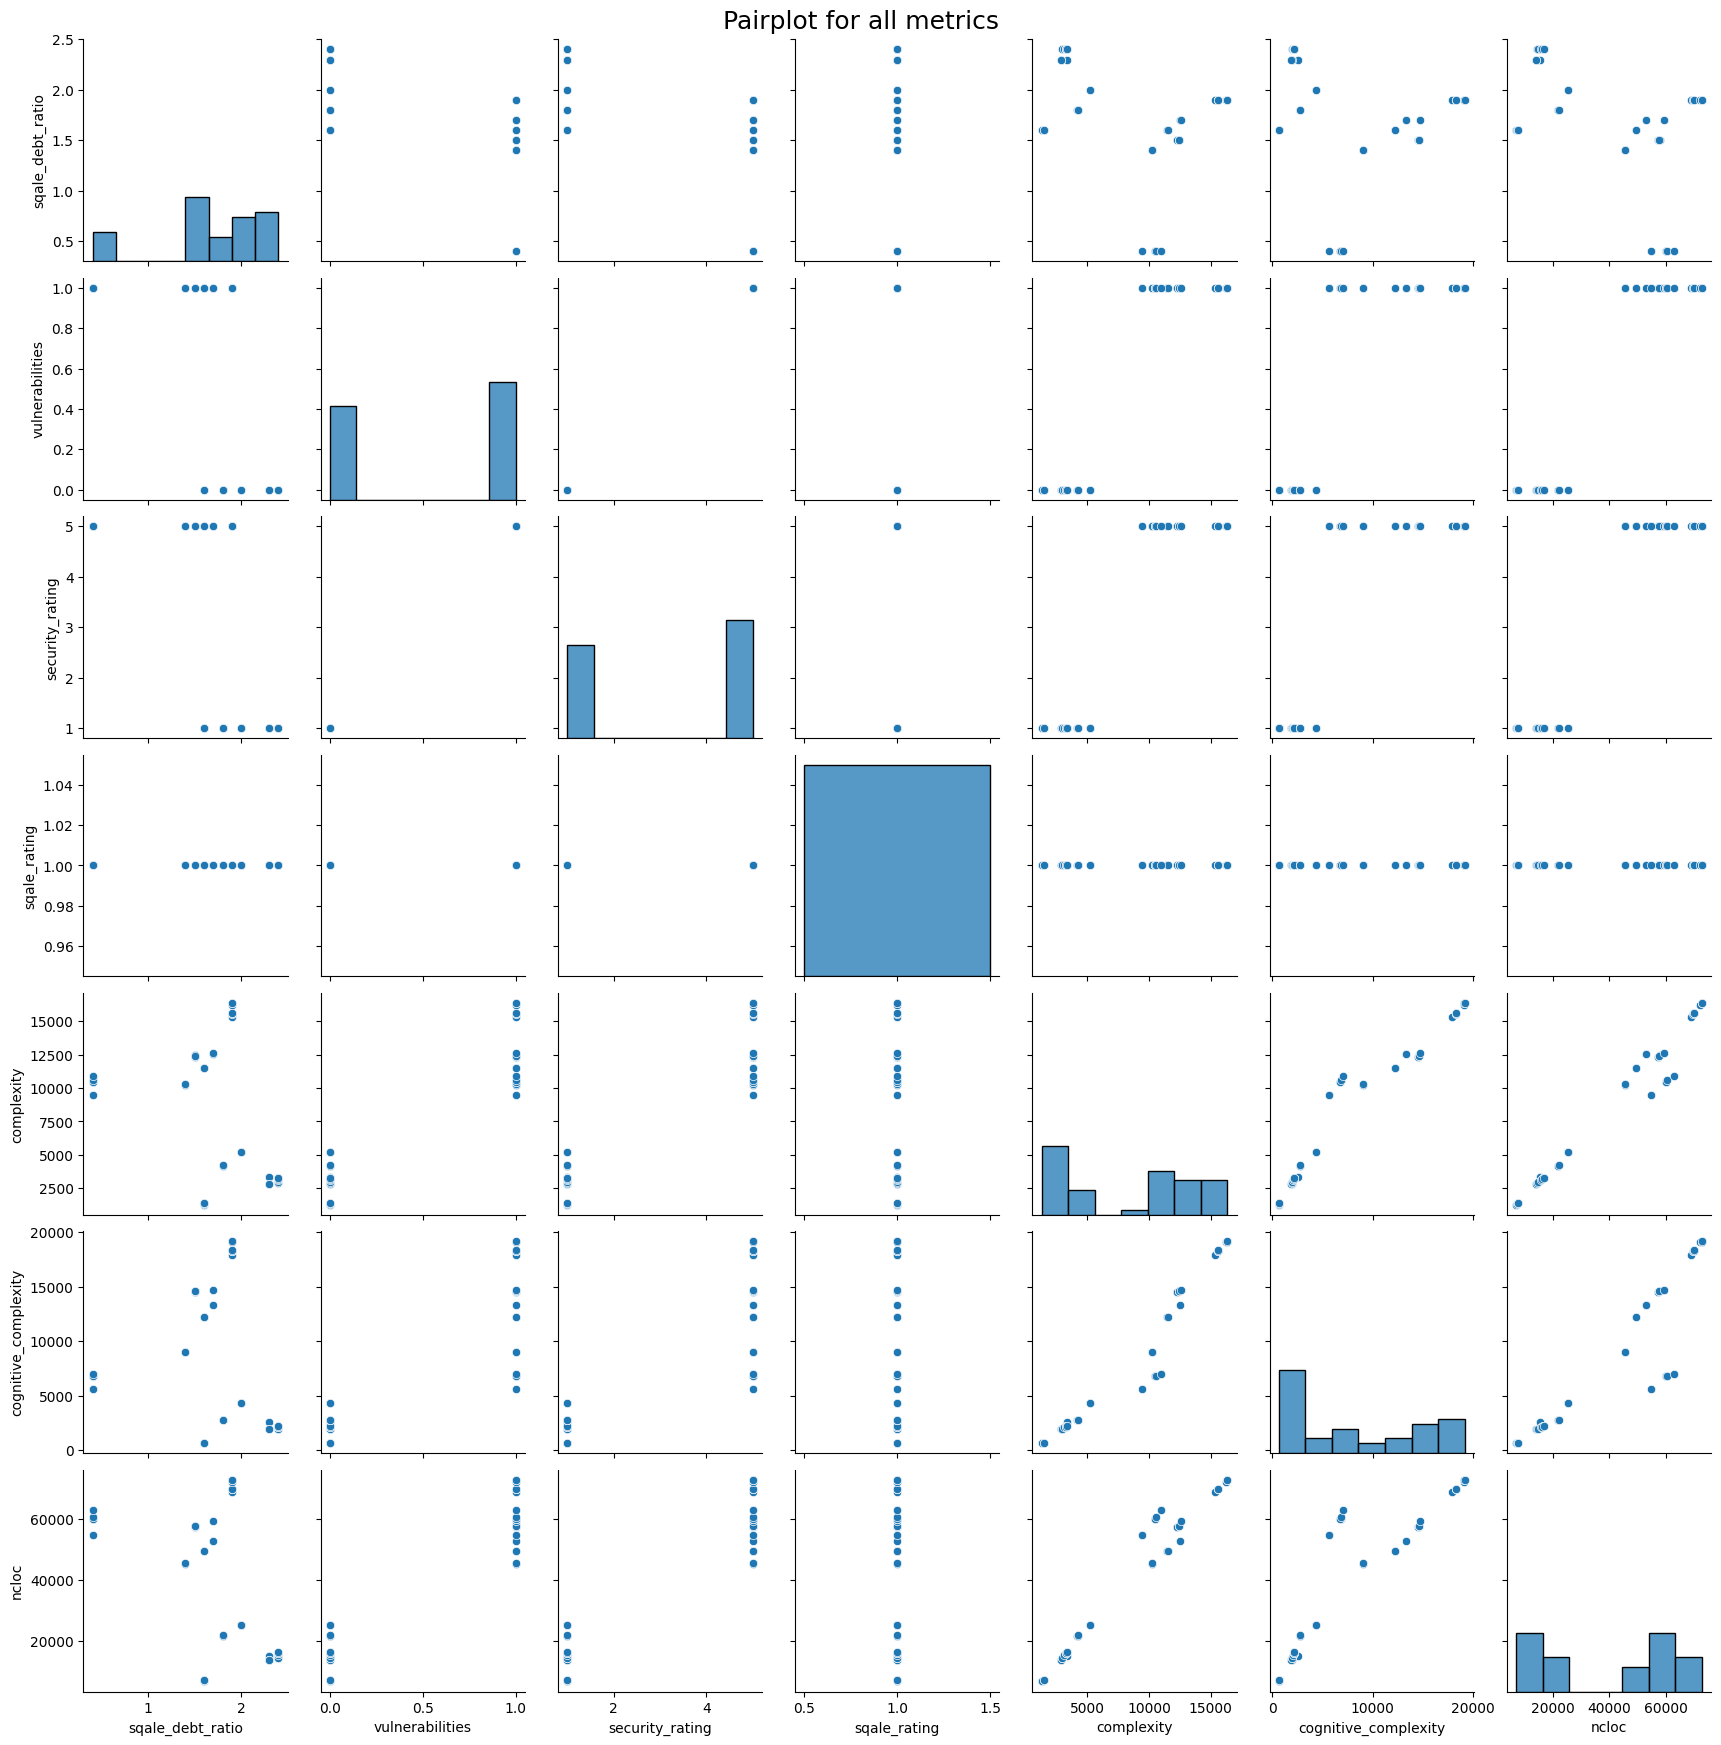

In [20]:
sns.pairplot(df[columns_for_controlChart])
plt.suptitle('Pairplot for all metrics', y=1., size=18)
plt.show()

### Visualization using Machine Learning Models

In [21]:
X = df[['ncloc']]
target_columns = ['complexity', 'cognitive_complexity', 'sqale_rating']

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'Support Vector': SVR(kernel='linear'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

Linear Regression Model for complexity:
Mean Squared Error: 1232311.9858536012
R-squared: 0.9515355267337777

Decision Tree Model for complexity:
Mean Squared Error: 1062991.111111111
R-squared: 0.9581945928644107

Random Forest Model for complexity:
Mean Squared Error: 1061282.576155556
R-squared: 0.9582617862761672

Gradient Boosting Model for complexity:
Mean Squared Error: 822986.3764314393
R-squared: 0.9676335200039472

Support Vector Model for complexity:
Mean Squared Error: 1409350.592467859
R-squared: 0.9445729369709243

MLP Regressor Model for complexity:
Mean Squared Error: 4642311.961730262
R-squared: 0.8174267502503472

Linear Regression Model for cognitive_complexity:
Mean Squared Error: 11522156.490460329
R-squared: 0.7499067828079986

Decision Tree Model for cognitive_complexity:
Mean Squared Error: 6608093.222222222
R-squared: 0.8565685776947654

Random Forest Model for cognitive_complexity:
Mean Squared Error: 7719114.274222221
R-squared: 0.8324534019034304

Gradient B

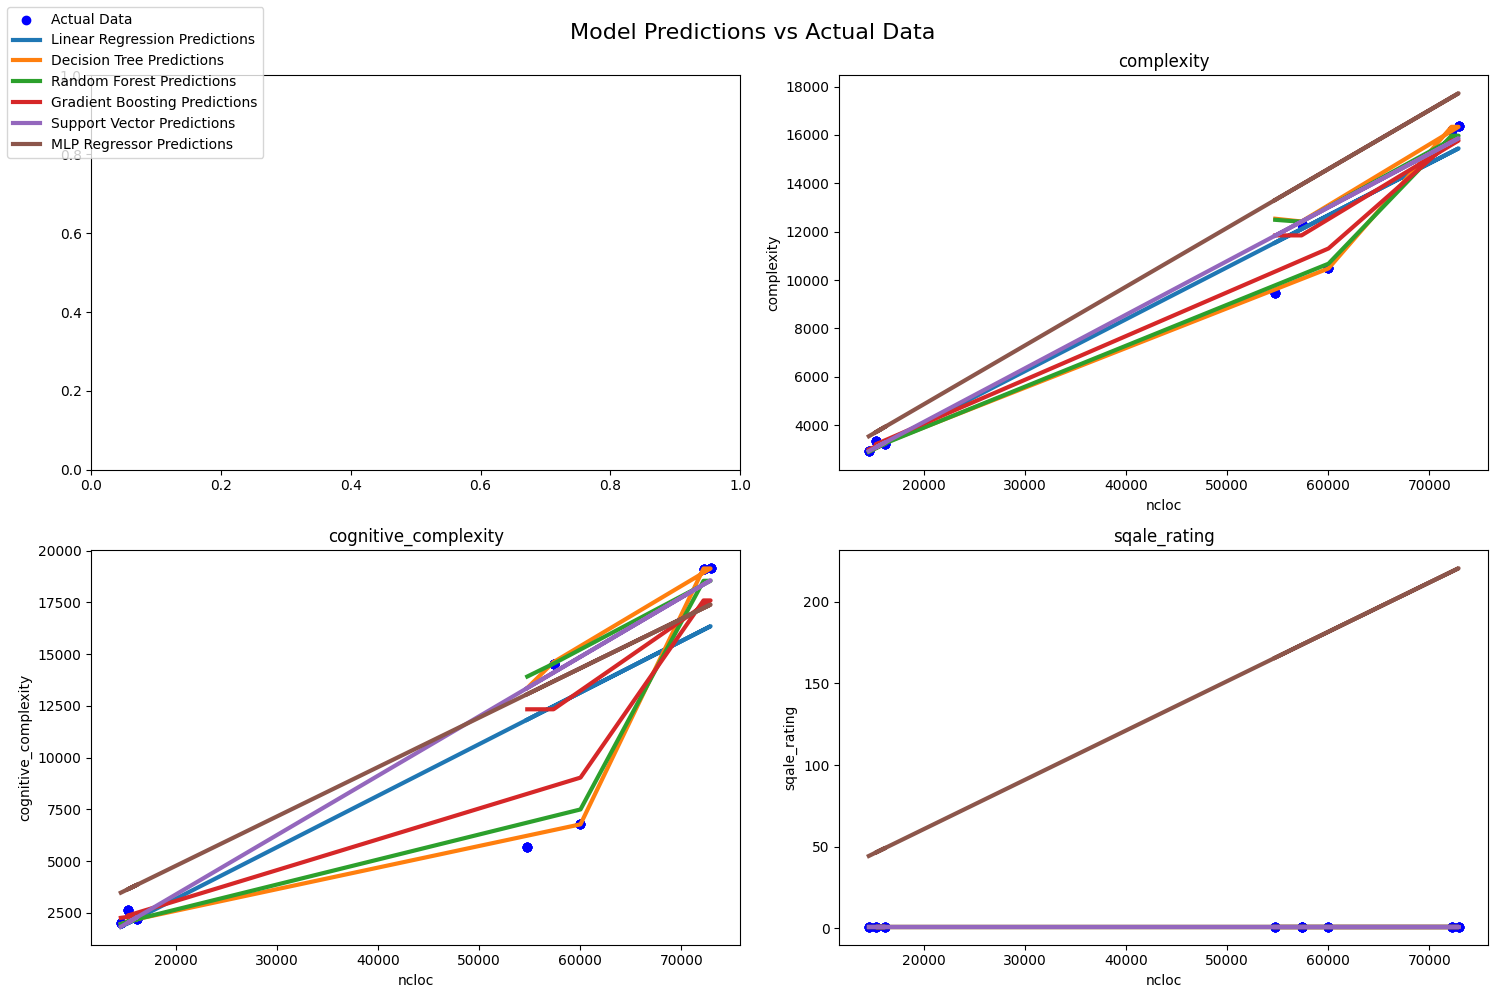

In [23]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Create a list to store handles for the legend
handles = []


# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate models
    results = {}
    for j, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3)

        # Set general name for the subplot
        axs[(i+1)//2, (i+1)%2].set_title(target_columns[i])

        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

        # Store handles for the legend
        if i == 0 and j == 0:
            handles.append(scatter)
        if i == 0:
            handles.extend(line)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Create a single legend for all subplots
labels = ['Actual Data'] + [name + ' Predictions' for name in models.keys()]
fig.legend(handles, labels, loc='upper left')

# Set a general title for the figure
fig.suptitle('Model Predictions vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()

Ensemble Model for complexity:
Mean Squared Error: 1027976.2524198391
R-squared: 0.9595716602811398

Ensemble Model for cognitive_complexity:
Mean Squared Error: 8459867.03406644
R-squared: 0.8163750539824769

Ensemble Model for sqale_rating:
Mean Squared Error: 0.0
R-squared: 1.0



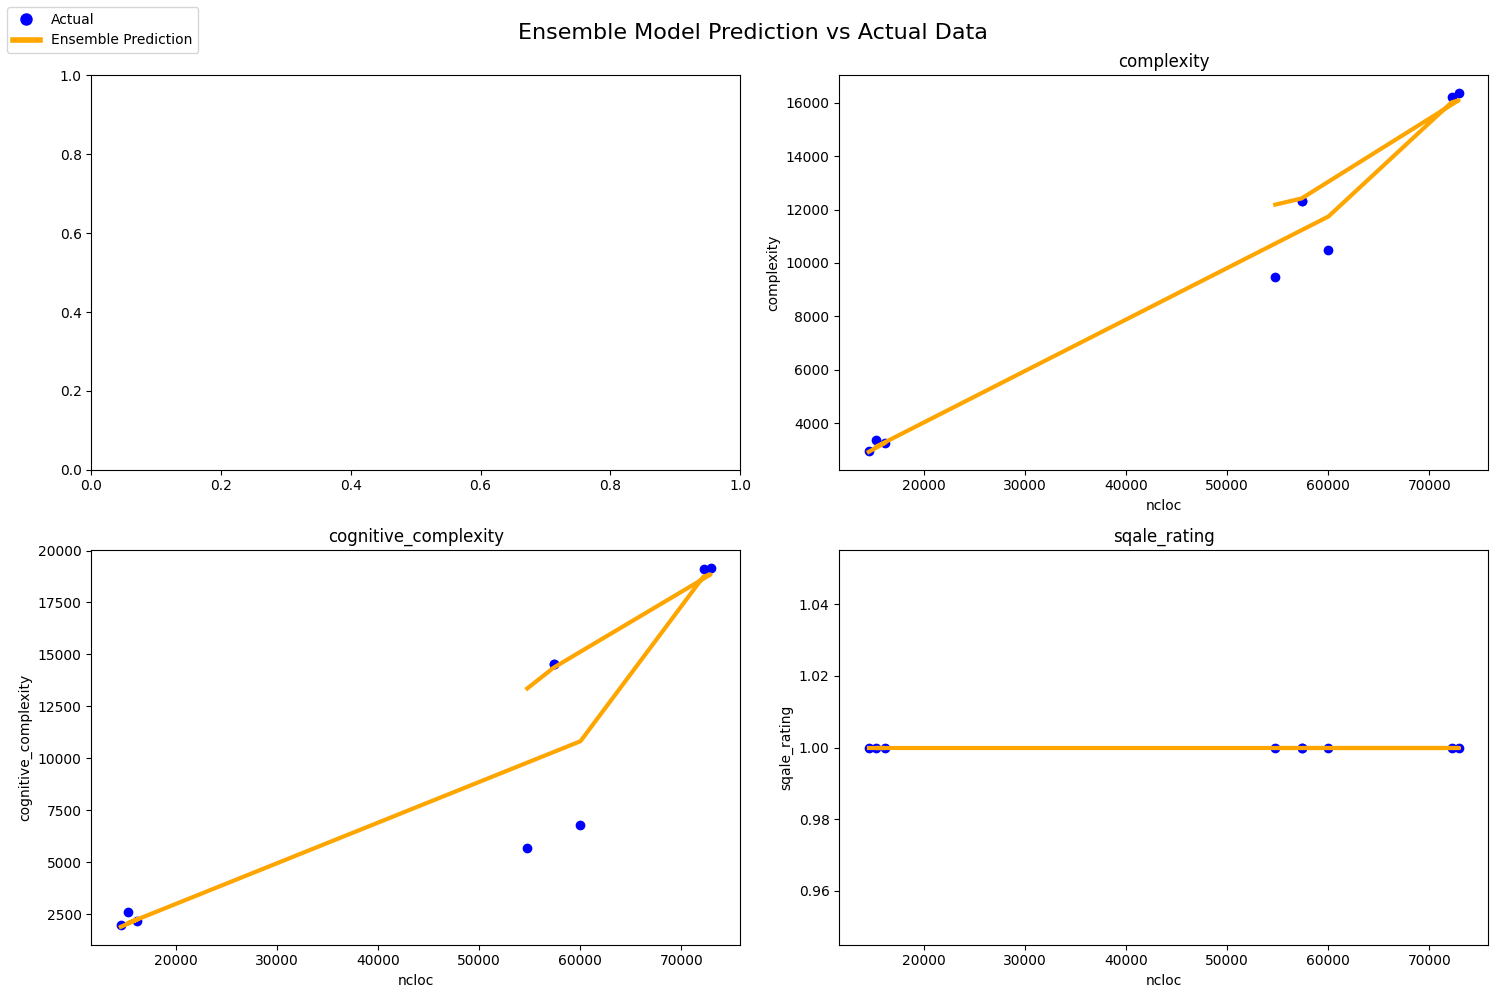

In [24]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define the Ensemble model
models = {
    'Ensemble': VotingRegressor([('SVM', SVR(kernel='linear')), ('Decision Tree', DecisionTreeRegressor(random_state=42))])
}

# Create custom legend handles and labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], color='orange', lw=4, label='Ensemble Prediction')]

# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate the Ensemble model
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3, color='orange')

        axs[(i+1)//2, (i+1)%2].set_title(f'{target}')
        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Add the legend to the figure
fig.legend(handles=legend_elements, loc='upper left')

# Set a general title for the figure
fig.suptitle('Ensemble Model Prediction vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()